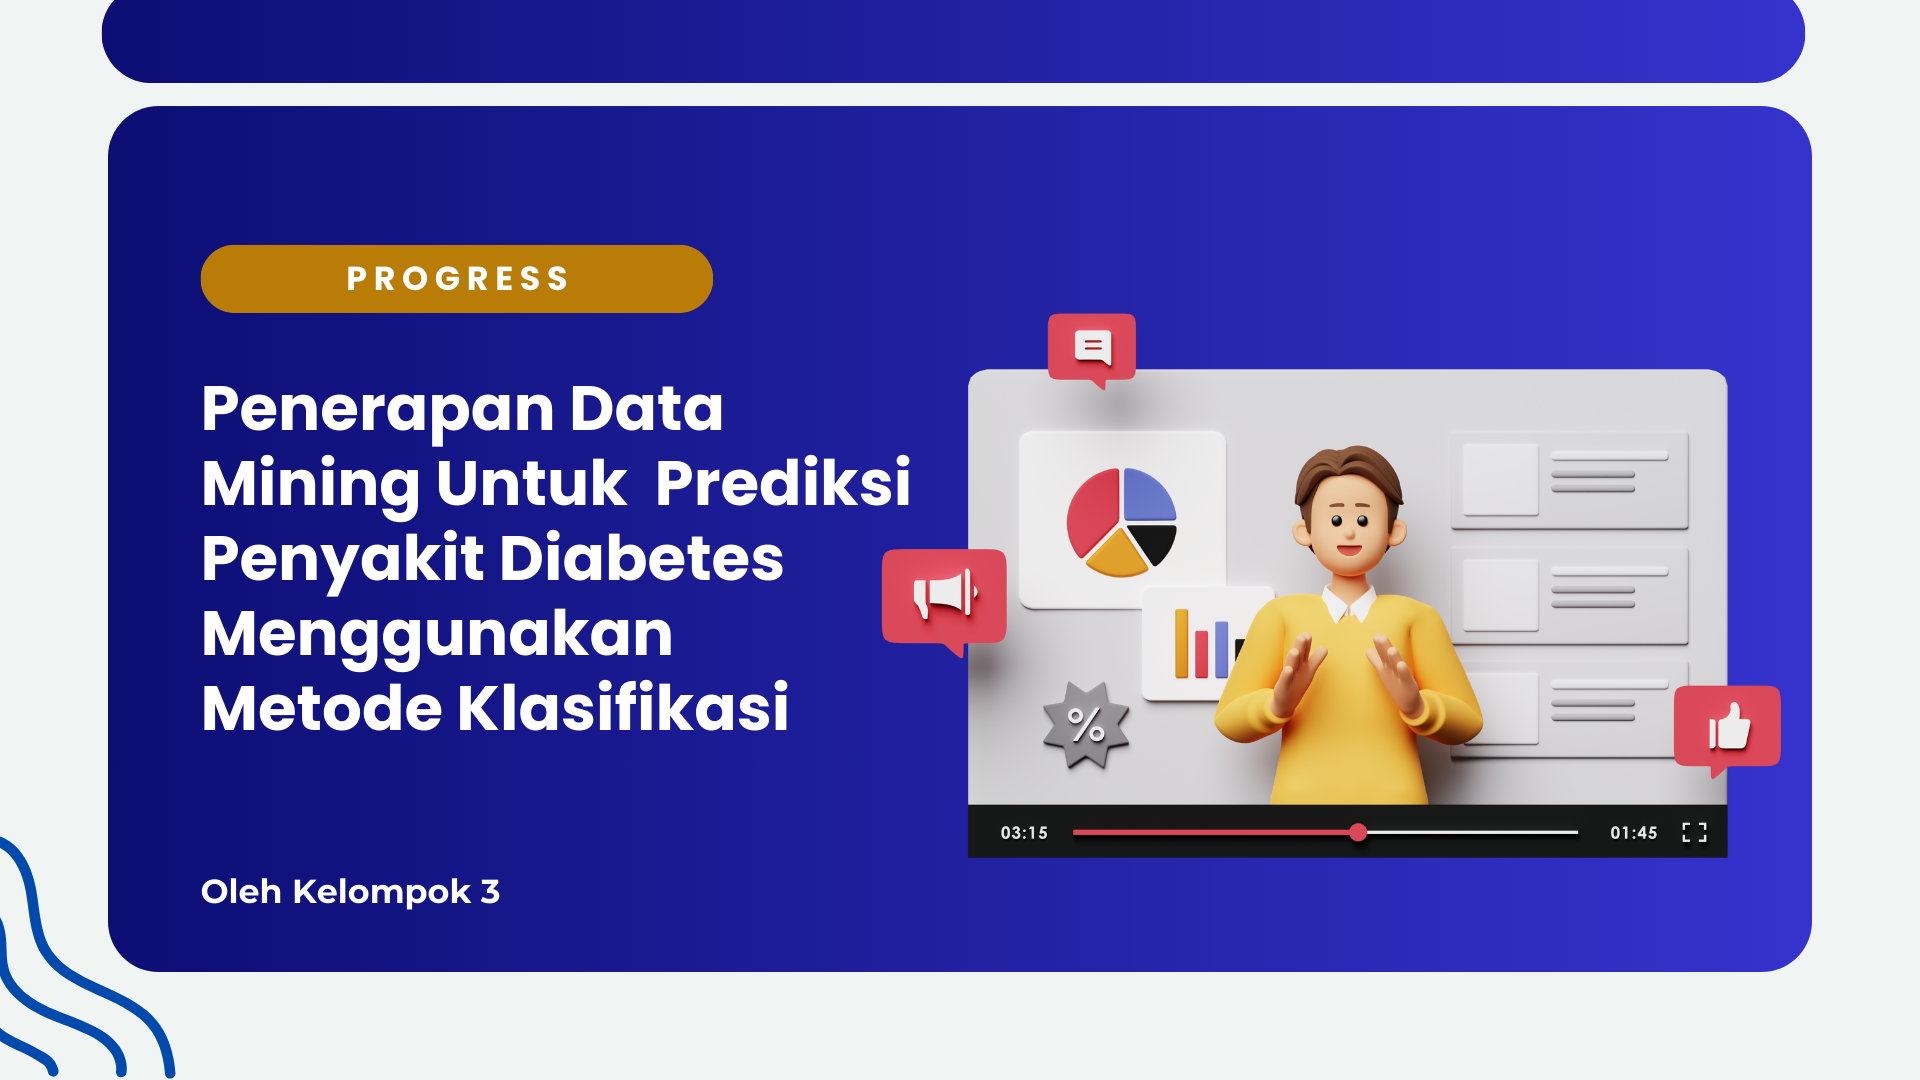

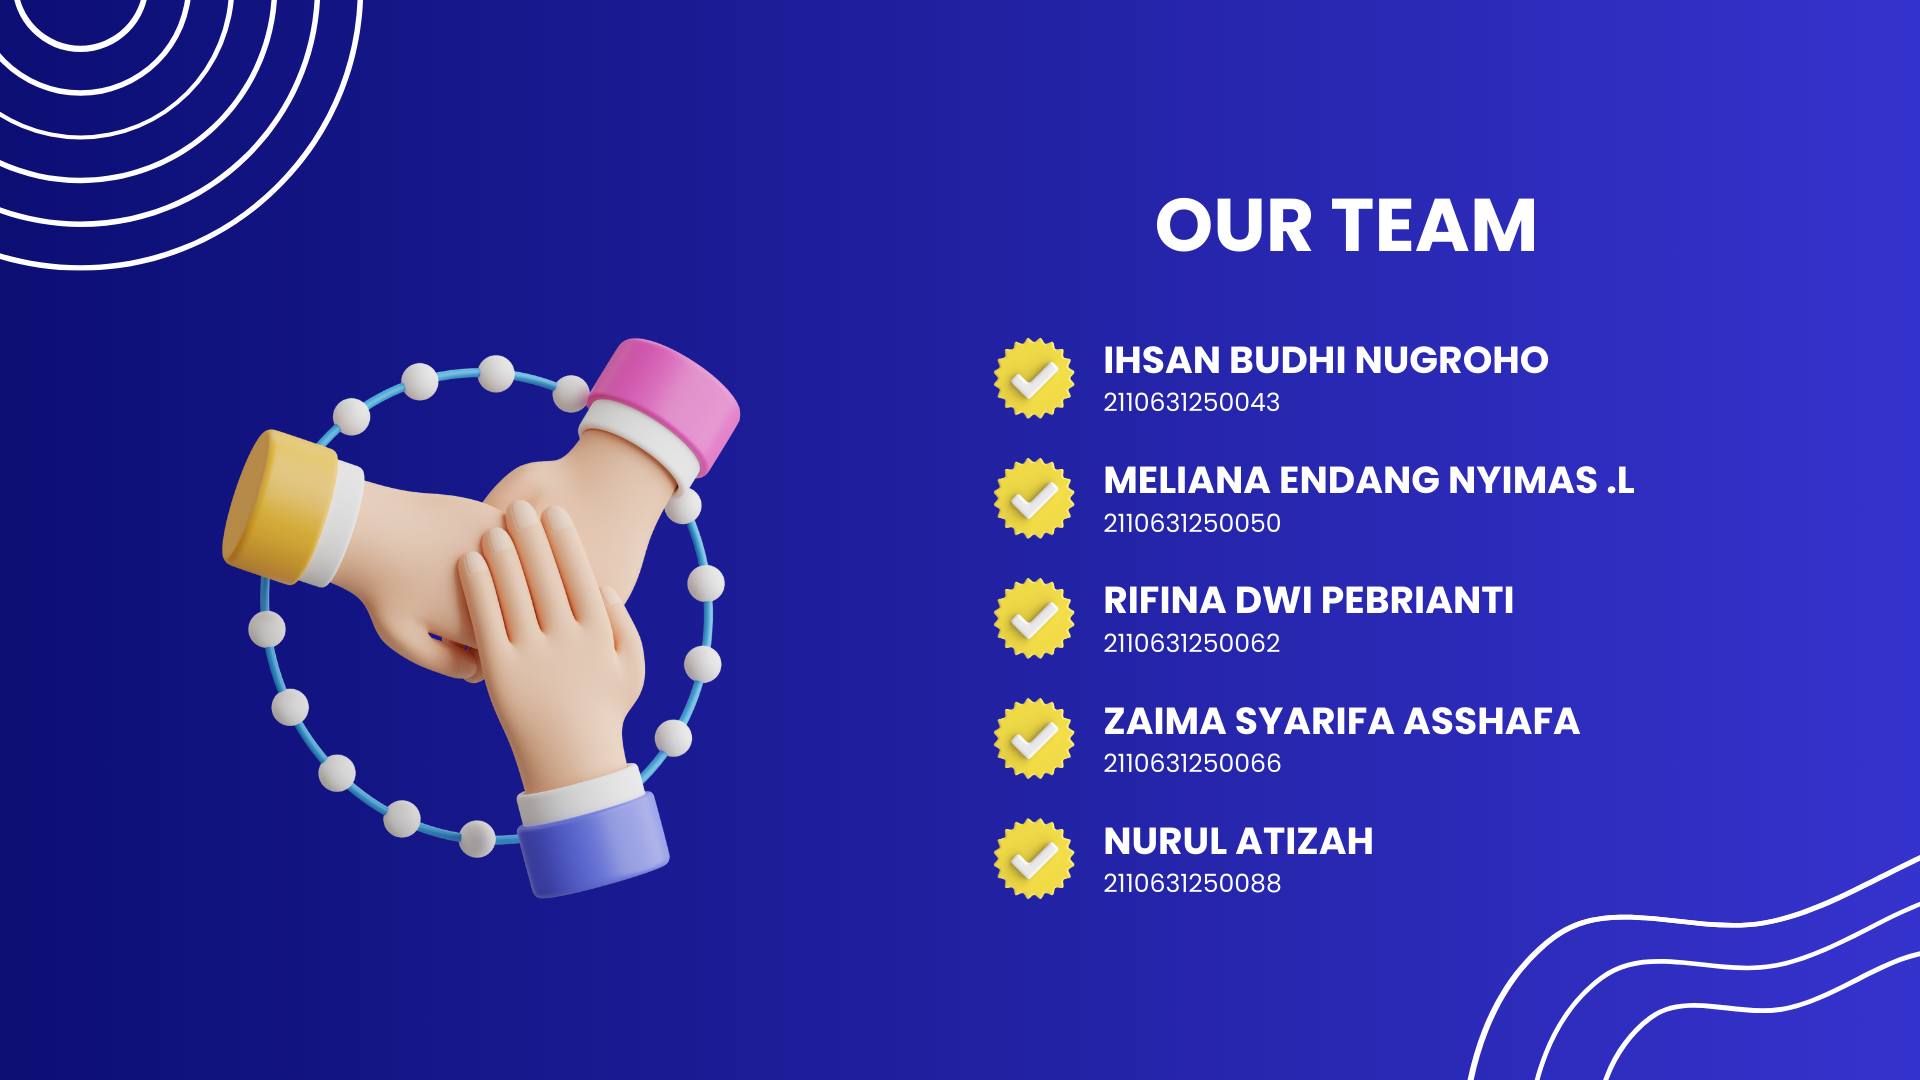

# **Business Understanding**

### Problem Background

Penyakit diabetes menjadi masalah kesehatan yang semakin meningkat di seluruh dunia. Identifikasi dini dan prediksi risiko diabetes dapat membantu dalam pencegahan dan manajemen penyakit yang lebih baik. Namun, belum ada metode yang optimal untuk melakukan prediksi secara efisien dan akurat.

### Goals

Pengembangan model prediksi diabetes yang akurat dan dapat diinterpretasikan

# **Data Understanding**

### Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
%matplotlib inline
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

### Import Drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/SEM6/'

/content/drive/MyDrive/SEM6


In [ ]:
diabetes= pd.read_csv('diabetes.csv')

### Descriptive Analysis

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Informasi fitur

- Pregencies: menyatakan Jumlah kehamilan
- Glucose: menyatakan kadar Glukosa dalam darah
- BloodPreasure: menyatakan pengukuran tekanan darah
- SkinThickness: menyatakan ketebalan kulit
- Insulin: menyatakan kadar Insulin dalam darah
- BMI: menyatakan indeks massa tubuh
- DiabetesPedigreeFunction : menyatakan persentase Diabetes
- Age: menyatakan usia
- Outcome: menyatakan hasil akhir untuk 1 adalah YA, 0 adalah TIDAK

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
print(diabetes.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Insight Descriptive Analyst:

- Diketahui bahwa tidak terdapat missing value pada dataset
- Tipe data setiap fitur telah sesuai
- Tipe data fitur dataset bertipe numerik (int dan float)
- Terdapat 9 kolom dan 768 baris
- Outcome sebagai fitur target atau label
- Karena dataset telah memiliki label sehingga metode yang digunakan adalah supervised learning
- Karena fitur target bertipe kategorikal, dipilih model klasifikasi
- Dari keseluruhan data terlihat untuk fitur pregnancies, glucose, bloodpresure, skinthickness, BMI, DiabetesPedigreeFunction, Age memiliki distribusi normal. hal ini dilihat dari jarak antara mean dan median data yang tidak terlalu jauh.
- Sedangkan untuk fitur insulin memiliki jarak yang cukup jauh untuk mean dan median datanya yaitu 79,37 dan 30,5 sehingga menimbulkan indikasi adanya outliers.

# **Pre Processing**

In [ ]:
# check missing values:
diabetes.isna().sum().to_frame('isna').T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
isna,0,0,0,0,0,0,0,0,0


In [ ]:
# check invalid values:
for col in diabetes:
    print(f"{col}: {diabetes[col].unique()}\n")

Pregnancies: [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

Glucose: [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]

BloodPressure: [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]

SkinThickness: [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 

In [ ]:
# check duplicated data
print(f"Number of dublicated: {diabetes.duplicated().sum()}")

Number of dublicated: 0


In [ ]:
%matplotlib inline
sns.pairplot(diabetes)
plt.show()

# **Exploratory Data Analisyst**

## **EDA 1**

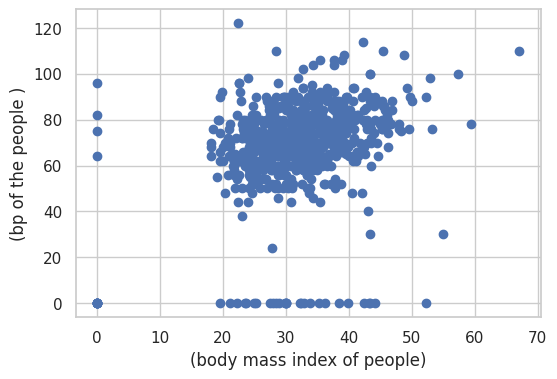

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(diabetes['BMI'], diabetes['BloodPressure'])
ax.set_xlabel('(body mass index of people)')
ax.set_ylabel('(bp of the people )')
plt.show()

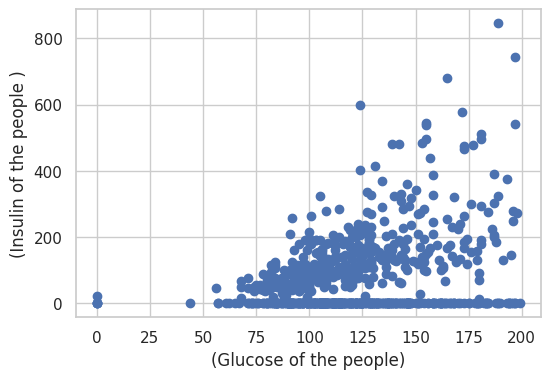

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(diabetes['Glucose'], diabetes['Insulin'])
ax.set_xlabel('(Glucose of the people)')
ax.set_ylabel('(Insulin of the people )')
plt.show()

In [ ]:
# Menghitung rata-rata menggunakan NumPy
means = np.mean(diabetes[selected_columns].drop(columns='Outcome'), axis=0)
print("Rata-rata:")
print(means)

NameError: name 'selected_columns' is not defined

In [ ]:
# Menghitung varians menggunakan NumPy
variances = np.var(diabetes[selected_columns], axis=0)
print("\nVarians:")
print(variances)

In [ ]:
# Menghitung deviasi standar menggunakan NumPy
std_devs = np.std(diabetes[selected_columns], axis=0)
print("\nDeviasi Standar:")
print(std_devs)

##**Multivariate analysyst 1**

In [ ]:
selected_columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
subset_diabetes = diabetes[selected_columns]

In [ ]:
correlation_matrix = subset_diabetes.corr()

In [ ]:
print(correlation_matrix)

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heat Map Korelasi')
plt.show()

## **Analisa Outliers Analysyst 1**

In [ ]:
# Menganalisis outlier menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetes.drop(columns='Outcome'))
plt.title('Boxplot untuk Fitur-Fitur Diabetes Dataset')
plt.xticks(rotation=45)
plt.show()

Insight :
- Nilai korelasi antar variabel dapat memberikan gambaran tentang hubungan linear antara fitur. Korelasi berkisar antara -1 hingga 1. Nilai mendekati 1 menunjukkan korelasi positif yang kuat, sementara nilai mendekati -1 menunjukkan korelasi negatif yang kuat. Korelasi mendekati 0 menunjukkan tidak adanya hubungan linear yang signifikan antara variabel tersebut.
- fitur Glucose memiliki korelasi positif yang signifikan dengan fitur  Outcome, dengan nilai korelasi sekitar 0.47. Ini menunjukkan bahwa tingkat glukosa yang lebih tinggi cenderung berkorelasi dengan peningkatan risiko diabetes.
- Terdapat korelasi positif yang cukup kuat antara insulin dan glukosa, dengan nilai korelasi sekitar 0.33. Ini wajar karena insulin diproduksi sebagai respons terhadap konsentrasi glukosa dalam darah.
- dari boxplot diatas fitur yang memiliki outliers terpaut jauh yaitu fitur insulin


## **Univariate analysyst**


In [ ]:
diabetes.describe().round(3).T

In [ ]:
df2 = diabetes.copy()
df2['Outcome'] = df2['Outcome'].map({1: "Yes", 0: "No"})

In [ ]:
df2.head()

In [ ]:
df2.info()

In [ ]:
categorical = df2.select_dtypes(['object'])
# draw countplot and pie plot of categorical data
for col in categorical:

    fig, axes = plt.subplots(1,2,figsize=(10,4))

    # count of col (countplot)
    sns.countplot(data=df2, x=col, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    # count of col (pie chart)
    slices = df2[col].value_counts().values
    activities = [f"{i} ({var})" for i, var in zip(df2[col].value_counts().index, df2[col].value_counts().index)]
    axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%')

    plt.suptitle(f'Count of Unique Value in {col}', y=1.09)
    plt.show()

In [ ]:
df3 = df2.copy()

In [ ]:
# Membuat fungsi untuk mengkategorikan usia
def Age_Category(Age):
    if Age < 26:
        return 'Remaja'
    elif Age < 60:
        return 'Dewasa'
    else:
        return 'Manula'

# Menggunakan fungsi untuk membuat kolom kategori usia baru
df3['kategori_usia'] = df3['Age'].apply(Age_Category)

In [ ]:
df3.info()

In [ ]:
df3 = df3.drop(columns=['Age'])

In [ ]:
df3['kategori_usia'].value_counts()

In [ ]:
# Menampilkan distribusi kategori usia dalam diagram batang
plt.figure(figsize=(6, 4))
df3['kategori_usia'].value_counts().plot(kind='bar', color='lightskyblue')
plt.suptitle(f'Age Category Distribution', y=1.09)
plt.xlabel('Kategori Usia', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
df3['kategori_usia'].value_counts().plot(kind='pie', shadow=True, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.ylabel('')
plt.tight_layout()
plt.show()

## **Bivariate Analysyst**

In [ ]:
# Menampilkan distribusi Outcome berdasarkan kategori usia
plt.figure(figsize=(10, 6))
sns.countplot(data=df3, x='kategori_usia', hue='Outcome')
plt.title('Distribusi Outcome Berdasarkan Kategori Usia')
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah')
plt.legend(title='Outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
outcome_distribution = df3.groupby(['kategori_usia', 'Outcome']).size().unstack()
outcome_distribution

## **Multivariate Analysyst**

In [ ]:
# Swarmplot untuk Glucose
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df3, x='kategori_usia', y='Glucose', hue='Outcome')
plt.title('Swarmplot untuk Glucose')
plt.xlabel('Kategori Usia', fontsize=12)
plt.ylabel('Glucose', fontsize=12)
plt.legend(title='Outcome')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Swarmplot untuk BloodPressure
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df3, x='kategori_usia', y='BloodPressure', hue='Outcome')
plt.title('Swarmplot untuk BloodPressure')
plt.xlabel('Kategori Usia', fontsize=12)
plt.ylabel('BloodPressure', fontsize=12)
plt.legend(title='Outcome')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## INSIGHT 3

1. Dari 768 data terdapat 268 data yang bernilai 1 / YES / Positive Diabetes , dan 500 data bernilai 0 / NO / Negative Diabetes.
2. Presentase distribusi Outcome 65,1% NO dan 34,9% YES
3. Dilakukan penkategorian berdasarkan fitur Age / usia
4. Setelah dilakukan pengkategorian usia ternyata terdapat :
     - 34,8% atau sejumlah 267 kategori usia remaja (< 25thn)
     - 61,1% atau sejumlah 469 kategori usia dewasa (<60thn)
     - 4,2% atau sejumlah 32 kategori usia manula (>60thn)
5. Meskipun begitu distribusi positive diabetes tertinggi berada pada kategori usia Dewasa yaitu sejumlah 214

# **MODELLING**

## **SVM**

In [ ]:
#Pisahkan atribut
X = diabetes[diabetes.columns[:8]]

#Pisahkan label output

y = diabetes['Outcome']

In [ ]:
from sklearn.preprocessing import StandardScaler

#Standarisasi

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC

# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
svc_model = clf.fit(X_train, y_train)

In [ ]:
# Menampilkan skor akurasi prediksi
svc_model.score(X_test, y_test)

In [ ]:
diabetes.head(5)

In [ ]:
#Test prediksi
#Jika 0 maka Tidak diabetes, jika 1 maka diabetes


print(svc_model.predict([[4,142,72,30,0,33.6,0.627,20]])[0])

In [ ]:
#Test prediksi
#Jika 0 maka Tidak diabetes, jika 1 maka diabetes


print(svc_model.predict([[4, 142, 72, 30, 0, 33.6, 0.627, 20]])[0])

## **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat model Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
print(model)

In [ ]:
# Membuat prediksi dengan model yang dilatih
y_pred = logreg_model.predict(X_test)

In [ ]:
# Menampilkan skor akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# Mengambil contoh satu instance untuk diprediksi
sample_instance = [[4, 142, 72, 30, 0, 33.6, 0.627, 20]]
# Melakukan prediksi menggunakan model Logistic Regression yang telah dilatih sebelumnya
predicted_outcome = logreg_model.predict(sample_instance)
# Menampilkan hasil prediksi
print(predicted_outcome[0])

## **Random forest**

In [ ]:
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
# Membuat prediksi dengan model yang dilatih
y_pred = rf_model.predict(X_test)

In [ ]:
# Menampilkan skor akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# Mengambil contoh satu instance untuk diprediksi
sample_instance = [[4, 142, 72, 30, 0, 33.6, 0.627, 20]]

# Melakukan prediksi menggunakan model Random Forest yang telah dilatih sebelumnya
predicted_outcome = rf_model.predict(sample_instance)

# Menampilkan hasil prediksi
print(predicted_outcome[0])

## **GRADIENBOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat model Gradient Boosting
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train, y_train)

In [ ]:
# Membuat prediksi dengan model yang dilatih
y_pred = gbm_model.predict(X_test)

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# **Final Model**

In [ ]:
# Data hasil akurasi algoritma model
data = {
    'Model': ['SVM', 'Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [0.727, 0.753, 0.727, 0.740]
}
df4 = pd.DataFrame(data)
max_accuracy_row = df4.loc[df['Accuracy'].idxmax()]
highlighted_df4 = df4.style.apply(lambda x: ['background: green' if x.name == max_accuracy_row.name else '' for i in x], axis=1)
highlighted_df4

# **OVERSAMPLING**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

df5 = diabetes.copy()
df5['Outcome'] = df5['Outcome'].map({1: "Yes", 0: "No"})

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

X = df5.drop('Outcome', axis=1)
y = df5['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
df_resampled = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train.columns), pd.DataFrame(y_train_resampled, columns=['Outcome'])], axis=1)
print("Jumlah sampel setelah oversampling:")
print(df_resampled['Outcome'].value_counts())

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()

model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}
model = LogisticRegression(max_iter=1000)

# GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)
print("Parameter terbaik:", grid_search.best_params_)
print("Akurasi terbaik:", grid_search.best_score_)

## standarisasi fitur

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

In [ ]:
standarized_data = scaler.transform(X)

In [ ]:
print(standarized_data)

In [ ]:
X = standarized_data
Y = diabetes['Outcome']

In [ ]:
print(X)
print(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Akurasi data training = ', training_data_accuracy)

In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Akurasi data testing = ', test_data_accuracy)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X = diabetes[diabetes.columns[:8]]
y = diabetes['Outcome']

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

clf = SVC()
svc_model = clf.fit(X_train, y_train)
svc_model.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Membagi data menjadi data pelatihan dan data uji dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Inisialisasi model regresi logistik
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Melatih model pada data pelatihan
logreg_model.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = logreg_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# UNDERSAMPLING

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
print("Jumlah kelas setelah undersampling:", y_resampled.value_counts())

In [ ]:
# LOGISTIC REG
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_resampled, y_resampled)
y_pred = logreg_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# **HANDLING OUTLIERS**

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Assuming you want to use logistic regression as your classifier
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the number of data after oversampling
print("Number of data after oversampling:")
print(pd.Series(y_resampled).value_counts())

In [ ]:
# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

# akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

In [ ]:
# Membuat model SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Akurasi SVM:", accuracy_svm)

In [ ]:
# Membuat model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Akurasi Random Forest:", accuracy_rf)

In [ ]:
# Membuat model Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Akurasi Gradient Boosting:", accuracy_gb)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix dalam bentuk DataFrame
conf_matrix_rf_df = pd.DataFrame(conf_matrix_rf, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Membuat visualisasi confusion matrix dalam bentuk diagram tabel
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix untuk Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix Random Forest:")
print(conf_matrix_rf)


In [ ]:
from sklearn.metrics import accuracy_score

# Menghitung akurasi pada data pelatihan
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Akurasi pada data pelatihan:", train_accuracy)

# Menghitung akurasi pada data pengujian
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Akurasi pada data pengujian:", test_accuracy)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Melakukan cross-validation dengan 5 fold
scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# Menampilkan hasil cross-validation
print("Cross Validation Scores:", scores)
print("Rata-rata Cross Validation Score:", scores.mean())


# Save model

In [ ]:
# Menyimpan model dalam format .sav
import joblib
joblib.dump(rf_model, 'random_forest_model.sav')

In [ ]:
import pickle
with open('random_forest_model.sav', 'wb') as f:
    pickle.dump(rf_model, f)

In [ ]:
import os

save_dir = 'C:/Users/zaima/Downloads/streamlit-diabetes-main/streamlit-diabetes-main'
model_filename = 'random_forest_model.sav'

# Membuat direktori jika belum ada
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

model_path = os.path.join(save_dir, model_filename)
with open(model_path, 'wb') as f:
    pickle.dump(rf_model, f)

print("Model Random Forest telah disimpan di:", model_path)

In [ ]:
import os
import pickle

# Tentukan direktori dan nama file untuk menyimpan model
save_dir = 'C:/Users/zaima/download'
model_filename = 'random_forest_model.sav'

# Gabungkan direktori dan nama file untuk mendapatkan path lengkap
model_path = os.path.join(save_dir, model_filename)

# Simpan model ke dalam file .sav menggunakan pickle
with open(model_path, 'wb') as f:
    pickle.dump(rf_model, f)

print("Model Random Forest telah disimpan di:", model_path)

In [ ]:
import pickle
filename = 'random_forest_model.sav'
pickle.dump(rf_model, open(filename,'wb'))

In [ ]:
import os

folder_path = 'D:/saved_models'  # Ganti dengan path folder Anda

if os.path.exists(folder_path):
    print("Direktori ada.")
else:
    print("Direktori tidak ada atau tidak dapat diakses.")


In [ ]:
import os
import pickle

# Tentukan direktori dan nama file untuk menyimpan model di drive D
save_dir = '/'
model_filename = 'random_forest_model.sav'

# Pastikan direktori tersedia, jika tidak, buat direktori baru
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Gabungkan direktori dan nama file untuk mendapatkan path lengkap
model_path = os.path.join(save_dir, model_filename)

# Simpan model ke dalam file .sav menggunakan pickle
with open(model_path, 'wb') as f:
    pickle.dump(rf_model, f)

print("Model Random Forest telah disimpan di:", model_path)
